### Marta Solarz ###
# Projekt zaliczeniowy 3 #


Rozważamy następujące równanie różniczkowe:

$\begin{cases}\dot{x} = xt^{-1} - 5t^2x^3 &  \\ x(1)=1 \end{cases}$

Uzyskaj numeryczne przybliżenie rozwiązania tego równania na przedziale $[1, 5]$ za pomocą podanych niżej metod Rungego Kutty. 

Określ uzyskany w symulacjach rząd zbieżności metod badając błędy w węzłach metodą wykorzystywaną na laboratoriach. 

Wybierz odpowiednią początkową ilość węzłów i wykonaj tyle zagęszczeń, aby redukcja błędu przy zagęszczaniu się ustabilizowała. 

Wykonaj rysunek porównujący rozwiązanie dokładne oraz obliczone przybliżenia.

In [1]:
import matplotlib.pyplot as plt
import numpy 
import sympy
from sympy.utilities.lambdify import lambdify

In [2]:
plt.rc('font', size=15)
plt.rc('figure', figsize=(16,9))

In [3]:
# definiujemy parametry:
t0 = 1
x0 = 1
T = 5

In [4]:
# implementujemy równanie różniczkowe

t = sympy.symbols('t')
x = sympy.Function('x')

eq = sympy.Eq(sympy.Derivative(x(t), t), x(t)*(t**(-1))-5*(t**2)*(x(t)**3))
eq

Eq(Derivative(x(t), t), -5*t**2*x(t)**3 + x(t)/t)

In [5]:
sol = sympy.dsolve(eq)
sol

[Eq(x(t), -t*sqrt(1/(C1 + 2*t**5))), Eq(x(t), t*sqrt(1/(C1 + 2*t**5)))]

Mamy zatem dwa rozwiązania ogólne.

In [6]:
sol_Cauchy = sympy.dsolve(eq, ics = {x(t0) : x0})
sol_Cauchy

Eq(x(t), t*sqrt(1/(2*t**5 - 1)))

Ale tylko jedno rozwiązanie szczególne spełnia warunek początkowy $x(1)=1$.

In [7]:
# rozwiązanie dokładne:
dokl = lambdify(t, sol_Cauchy.rhs)
dokl

<function _lambdifygenerated(t)>

### Schemat LP3.1 - Heuna (schemat otwarty) ###

In [8]:
f = lambdify((t, x(t)), eq.rhs)

In [9]:
td = numpy.linspace(t0, T, 1000)
xd = dokl(td)

(0.0, 1.0)

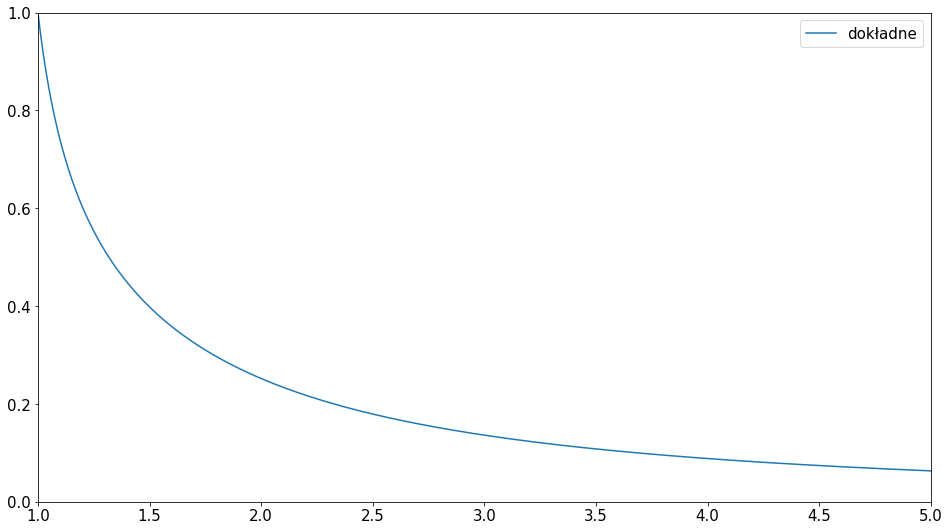

In [10]:
# rozwiązanie dokładne:
plt.plot(td, xd, label="dokładne")
curr_error=None
plt.legend()
plt.xlim([1,5])
plt.ylim([0,1])

In [11]:
# definiujemy metodę Heuna:
def Heuna(f, t0, T, N, x0):
    t, h = numpy.linspace(t0, T, N+1, retstep=True)
    
    x = numpy.zeros(t.shape)
    x[0]=x0
       
    for n in range(N):
        K0 = f(t[n],x[n])
        K1 = f(t[n]+1/3*h,x[n]+h*1/3*K0)
        K2 = f(t[n]+2/3*h,x[n]+h*(0*K0+2/3*K1))
        x[n+1] = x[n] + h*(1/4*K0+0*K1+3/4*K2)
   
    return (t, x)

In [12]:
# węzły:
node = [10,20,30,50,100,1000,10000,100000]

<lambdifygenerated-2>:2: RuntimeWarning: overflow encountered in double_scalars
  return -5*_Dummy_297**3*t**2 + _Dummy_297/t
<lambdifygenerated-2>:2: RuntimeWarning: invalid value encountered in double_scalars
  return -5*_Dummy_297**3*t**2 + _Dummy_297/t
C:\Users\Marta\AppData\Local\Temp\ipykernel_6176\1746554842.py:12: RuntimeWarning: invalid value encountered in double_scalars
  x[n+1] = x[n] + h*(1/4*K0+0*K1+3/4*K2)


N =   10, Błąd = 9.098e+50
N =   20, Błąd = 1.764e-01, Stosunek: 5.16e+51
N =   30, Błąd = 4.863e-02, Stosunek: 3.63
N =   50, Błąd = 9.028e-03, Stosunek: 5.39
N =  100, Błąd = 7.988e-04, Stosunek: 11.3
N = 1000, Błąd = 5.821e-07, Stosunek: 1.37e+03
N = 10000, Błąd = 5.609e-10, Stosunek: 1.04e+03
N = 100000, Błąd = 5.589e-13, Stosunek: 1e+03


(0.0, 1.0)

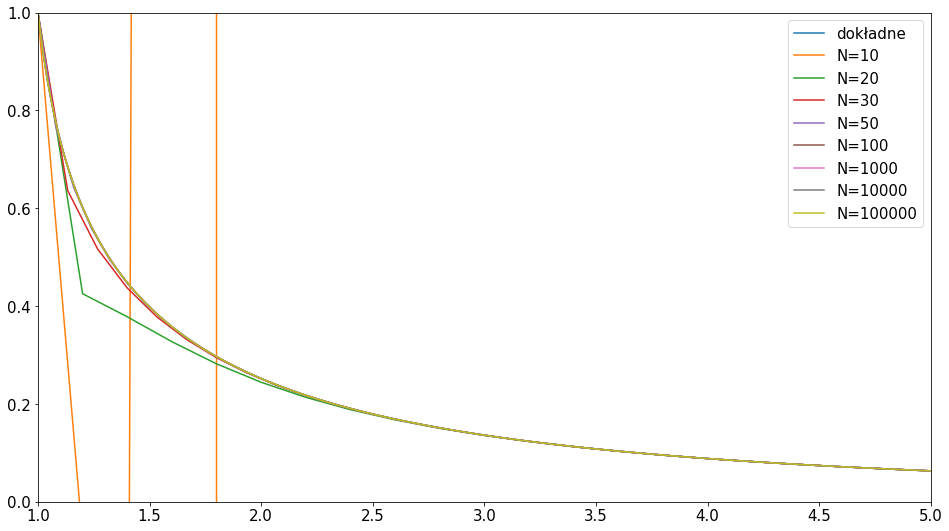

In [13]:
# wykonujemy wykres rozwiązania dokładnego i przybliżeń za pomocą metody Heuna:
plt.plot(td, xd, label="dokładne")
curr_error=None

for N in node: 
    t, x = Heuna(f, t0, T, N, x0)
    plt.plot(t, x, label=f"N={N}")
    
    prev_error, curr_error = curr_error, max(numpy.abs(x-dokl(t)))
    if(prev_error is None):
        print(f'N = {N:4d}, Błąd = {curr_error:.3e}')
    else:
        print(f'N = {N:4d}, Błąd = {curr_error:.3e}, Stosunek: {prev_error/curr_error:.3}')

plt.legend()
plt.xlim([1,5])
plt.ylim([0,1])

Im większa wartość N, tym bardziej obliczone przybliżenie odpowiada rozwiązaniu dokładnemu. 